In [1]:
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.insert(0, '../zdrojaky/kf')
from kf import KF
from trajectory import trajectory
np.set_printoptions(precision=2)

# 2D object tracking

Our goal is the filtration of the 2D location of a moving object. We will sequentially estimate its state vector consisting of locations in the two planar coordinates  $x_1$ a $x_2$ and related velocities.

$$
x_t =
\begin{bmatrix}
x_{1,t} \\ 
x_{2,t} \\ 
v_{x_1,t} \\ 
v_{x_2,t}
\end{bmatrix}
$$

We know that for the first coordinate it holds

$$
x_{1,t} = x_{1,t-1} + v_{x_1,t} dt + w_{x_1,t},
$$

and analogously for the other coordinate. In order to simplify the model, we will assume that the velocity is virtually constant and its changes are due to the state noise,

$$
v_{x_1,t} = v_{x_1, t-1} + w_{vx_1, t}.
$$

Analogously for the other velocity vector. Now, we have only noisy measurements of position with obtained each 0.1s.

First, we construct the state-space model

$$
\begin{aligned}
x_t &\sim \mathcal{N}(Ax_{t-1} + Bu_t, Q),\\
y_t &\sim \mathcal{N}(Hx_{t}, R).
\end{aligned}
$$

**Task 1: Construct the models and determine the matrices**

Obtaining the covariance matrices is a tedious task. We assume that we know them:

\begin{align*}
    A &=?
%    \begin{bmatrix}
%       1 & 0 & dt & 0 \\
%       0 & 1 & 0 & dt \\
%       0 & 0 & 1 &  0 \\
%       0 & 0 & 0 &  1 
%    \end{bmatrix},
    \quad
    &Q &= q\cdot
    \begin{bmatrix}
        \frac{dt^3}{3}    & 0                 & \frac{dt^{2}}{2}  & 0  \\
        0                 & \frac{dt^3}{3}    & 0                 & \frac{dt^{2}}{2} \\
        \frac{dt^{2}}{2}  & 0                 & dt                & 0 \\
        0                 & \frac{dt^{2}}{2}  & 0                 & dt
    \end{bmatrix}
    \notag \\
    H &=?
%    \begin{bmatrix}
%        1 & 0 &0 & 0 \\
%        0 & 1 &0 & 0
%    \end{bmatrix}
    \quad
    &R &=
    r^{2}\cdot
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix}
\end{align*}
where $dt = 1$, $q = .5$, $r=3$.

**Task 2: Define variables**

In [4]:
q = 0.5
dt = 1
r = 3
A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
Q = q*np.array([[(dt**3)/3, 0, (dt**2)/2, 0], [0, (dt**3)/3, 0, (dt**2)/2], [(dt**2)/2, 0, dt, 0], [0, (dt**2)/2, 0, dt]])
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = (r**2)*np.array([[1, 0], [0, 1]]) 

**Task 3: substitute the day and month of your birth for `code`. The `traj` object will contain the trajectory (100 measurements row-wise). Plot it with crosses.**

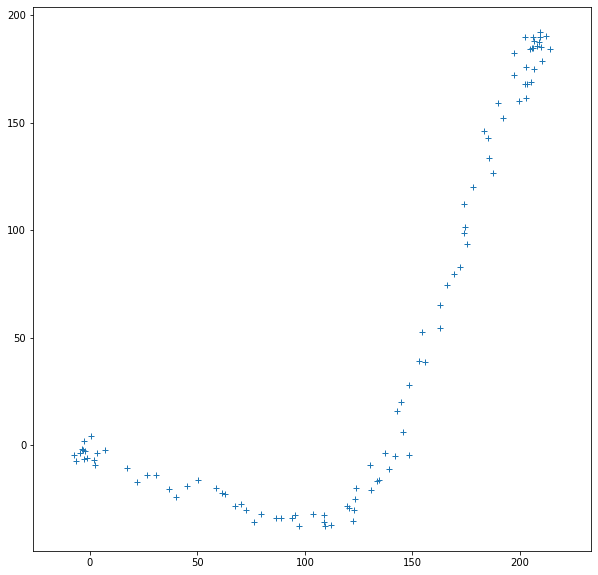

In [5]:
code = 1407
traj = trajectory(code)
plt.figure(figsize=(10, 10))
plt.plot(traj.Y[0,:], traj.Y[1,:], '+')
plt.axis('equal')
plt.show()

KF is the class of the Kalman filter. We simply "feed" it by rows in `traj.Y.T`

In [6]:
kf = KF(A=A, B=None, H=H, R=R, Q=Q)
for yt in traj.Y.T:
    kf.predict()
    kf.update(yt)
    kf.log()

log_x = np.array(kf.log_x).T      # Here are the estimates

**Task 4: `log_x` has 4 rows, each of them cointains $x_{t}$. Plot the measurements and the estimated trajectory.**

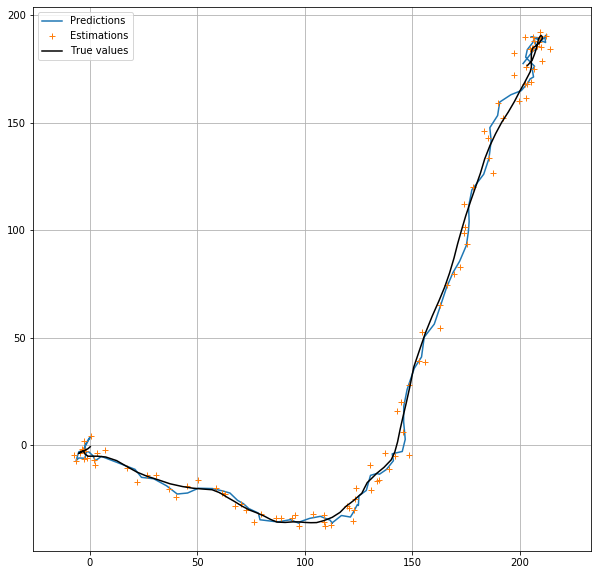

In [26]:
plt.figure(figsize=(10,10))
#################################
# YOUR CODE COMES HERE
plt.plot(log_x[0], log_x[1], '-', label='Predictions')
plt.plot(traj.Y[0], traj.Y[1], '+', label='Estimations')
plt.plot(traj.X[0], traj.X[1], 'k', label='True values')
#################################
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

**Task 5: The estimates contain speed evolution too. Plot it as 2 subplots side-by-side.**

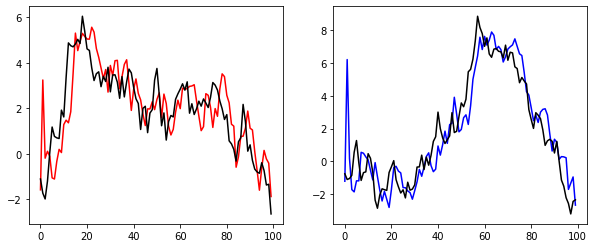

In [27]:
plt.figure(figsize=(10, 4))
#################################
# YOUR CODE COMES HERE
plt.subplot(121)
plt.plot(log_x[2], 'r', label='Predictions')
plt.plot(traj.X[2], 'k', label='True value')
#
plt.subplot(122)
plt.plot(log_x[3], 'b', label='Predictions')
plt.plot(traj.X[3], 'k', label='True value')
#################################
plt.show()

**Task 6: `traj` has an x-attribute, `traj.X`, which is a matrix of 4 rows containing true values of location and velocity. Add them to the plots in black color.**